# Long Short Term Memory (LSTM) - Playing with parameters V.2

In [2]:
# Import libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, time, csv
from collections import defaultdict
from math import sqrt

# Load libraries for LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

### Helper functions

In [3]:
# Load only 'Adj Close' column from CSV
def load_adj_close(filePath):
    columns = defaultdict(list) # each value in each column is appended to a list

    with open(filePath) as f:
        reader = csv.DictReader(f)    # read rows into a dictionary format
        for row in reader:            # read a row as {column1: value1, column2: value2,...}
            for (k,v) in row.items(): # go over each column name and value 
                columns[k].append(v)  # append the value into the appropriate list based on column name k

    return columns['Adj Close']

# Loading datasets and turn them into training and testing sets
def load_data_split_train_test(data, seq_len, normalise_window):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

# Normalize function
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

### Adjusted parameters

In [ ]:
# Change params and variables
batch_size = 1
nb_epoch = 10
seq_len = 50
input_dim=1
output_dim=50
loss='mean_squared_error'
optimizer = 'rmsprop'
activation = 'linear'

### Toyota

/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  from ipykernel import kernelapp as app
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=False, input_shape=(None, 1))`
  from ipykernel import kernelapp as app
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


compilation time :  0.0434877872467
Train on 2109 samples, validate on 111 samples
Epoch 1/10
2109/2109 [==============================] - 382s - loss: 6.2571e-04 - val_loss: 3.3298e-04
Epoch 2/10
2109/2109 [==============================] - 378s - loss: 3.7421e-04 - val_loss: 2.7696e-04
Epoch 3/10
2109/2109 [==============================] - 373s - loss: 3.6446e-04 - val_loss: 3.3144e-04
Epoch 4/10
2109/2109 [==============================] - 371s - loss: 3.6416e-04 - val_loss: 3.1862e-04
Epoch 5/10
2109/2109 [==============================] - 380s - loss: 3.5258e-04 - val_loss: 3.3712e-04
Epoch 6/10
2109/2109 [==============================] - 368s - loss: 3.5032e-04 - val_loss: 2.9586e-04
Epoch 7/10
2109/2109 [==============================] - 365s - loss: 3.5125e-04 - val_loss: 3.8444e-04
Epoch 8/10
2109/2109 [==============================] - 367s - loss: 3.4611e-04 - val_loss: 2.7786e-04
Epoch 9/10
2109/2109 [==============================] - 375s - loss: 3.4367e-04 - val_loss: 2

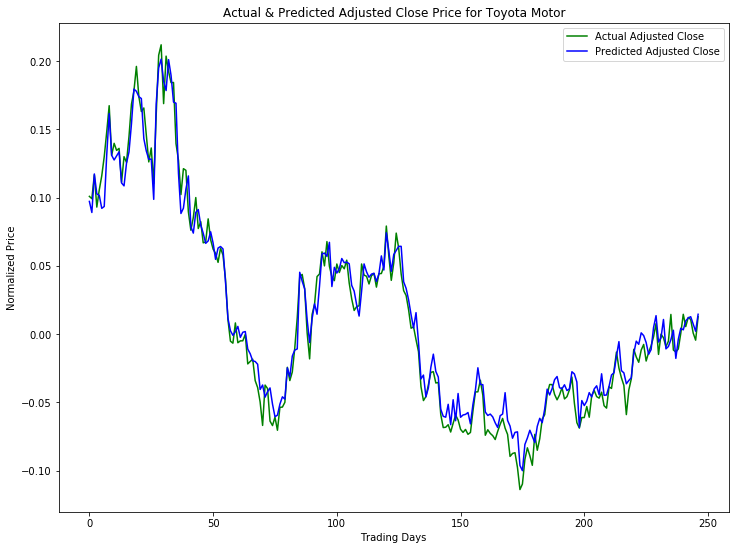

In [5]:
# Load datasets
csv_file = './data/TM.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=input_dim,
    output_dim=output_dim,
    return_sequences=False))

model.add(Dense(output_dim=1))
model.add(Activation(activation))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)

testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

TM_MSE = score
TM_RMSE = math.sqrt(score)
print 'Mean squared error (MSE)', TM_MSE
print 'Root Mean squared error (RMSE)', TM_RMSE

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for Toyota Motor')
ax.legend(loc='upper right')

plt.show()

### Apple

/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=False, input_shape=(None, 1))`
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


compilation time :  0.0543050765991
Train on 2147 samples, validate on 114 samples
Epoch 1/10
2147/2147 [==============================] - 59s - loss: 6.3911e-04 - val_loss: 8.0498e-04
Epoch 2/10
2147/2147 [==============================] - 54s - loss: 4.6627e-04 - val_loss: 8.0086e-04
Epoch 3/10
2147/2147 [==============================] - 54s - loss: 4.5784e-04 - val_loss: 7.8078e-04
Epoch 4/10
2147/2147 [==============================] - 54s - loss: 4.5848e-04 - val_loss: 7.5518e-04
Epoch 5/10
2147/2147 [==============================] - 55s - loss: 4.4847e-04 - val_loss: 7.6858e-04
Epoch 6/10
2147/2147 [==============================] - 55s - loss: 4.5372e-04 - val_loss: 7.8042e-04
Epoch 7/10
2147/2147 [==============================] - 55s - loss: 4.5374e-04 - val_loss: 7.9921e-04
Epoch 8/10
2147/2147 [==============================] - 54s - loss: 4.5055e-04 - val_loss: 7.9743e-04
Epoch 9/10
2147/2147 [==============================] - 54s - loss: 4.4896e-04 - val_loss: 7.8871e-04

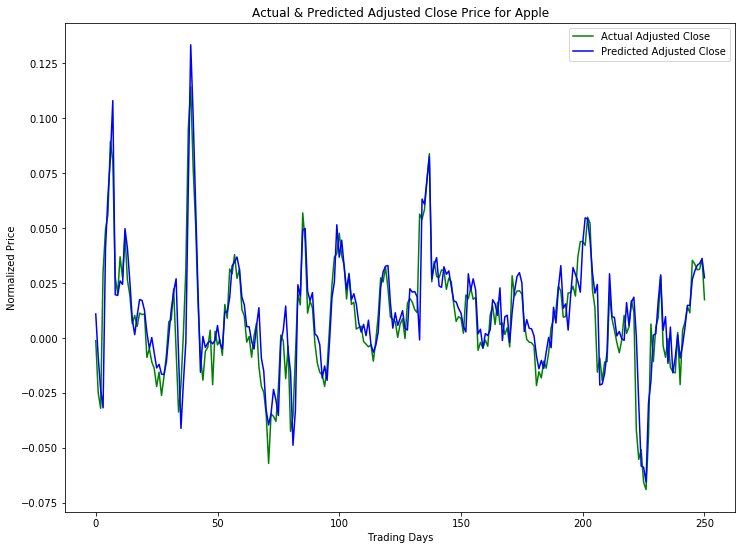

In [15]:
# Load datasets
csv_file = './data/AAPL.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=input_dim,
    output_dim=output_dim,
    return_sequences=False))

model.add(Dense(output_dim=1))
model.add(Activation(activation))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)

testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

APPL_MSE = score
APPL_RMSE = math.sqrt(score)
print 'Mean squared error (MSE)', APPL_MSE
print 'Root Mean squared error (RMSE)', APPL_RMSE

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for Apple')
ax.legend(loc='upper right')

plt.show()

### GE

/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=False, input_shape=(None, 1))`
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


compilation time :  0.0519678592682
Train on 2109 samples, validate on 111 samples
Epoch 1/10
2109/2109 [==============================] - 402s - loss: 7.9974e-04 - val_loss: 3.3255e-04
Epoch 2/10
2109/2109 [==============================] - 399s - loss: 4.5673e-04 - val_loss: 3.7058e-04
Epoch 3/10
2109/2109 [==============================] - 399s - loss: 4.3925e-04 - val_loss: 4.4615e-04
Epoch 4/10
2109/2109 [==============================] - 400s - loss: 4.2616e-04 - val_loss: 4.4810e-04
Epoch 5/10
2109/2109 [==============================] - 408s - loss: 4.2529e-04 - val_loss: 4.1711e-04
Epoch 6/10
2109/2109 [==============================] - 406s - loss: 4.3468e-04 - val_loss: 4.0632e-04
Epoch 7/10
2109/2109 [==============================] - 405s - loss: 4.1286e-04 - val_loss: 4.2283e-04
Epoch 8/10
2109/2109 [==============================] - 404s - loss: 4.0495e-04 - val_loss: 4.2577e-040504 - ETA: 2s - los
Epoch 9/10
2109/2109 [==============================] - 399s - loss: 4.14

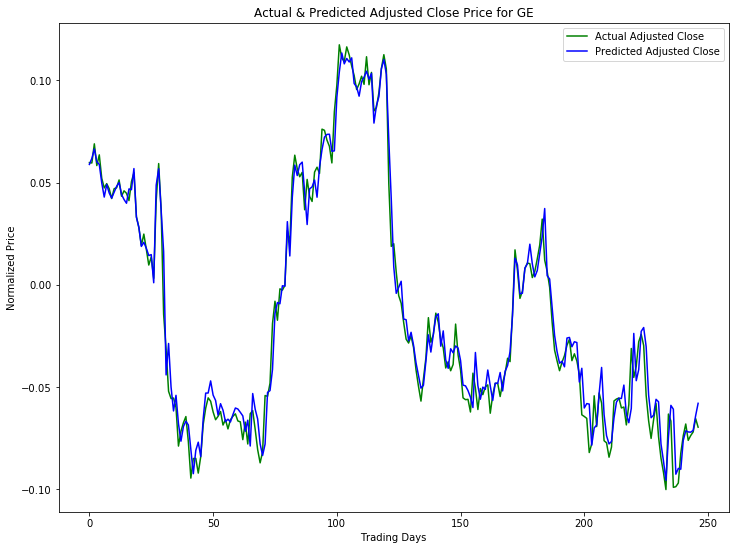

In [16]:
# Load datasets
csv_file = './data/GE.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=input_dim,
    output_dim=output_dim,
    return_sequences=False))

model.add(Dense(output_dim=1))
model.add(Activation(activation))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)


testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

GE_MSE = score
GE_RMSE = math.sqrt(score)
print 'Mean squared error (MSE)', GE_MSE
print 'Root Mean squared error (RMSE)', GE_RMSE

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for GE')
ax.legend(loc='upper right')

plt.show()

### Microsoft

/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=False, input_shape=(None, 1))`
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


compilation time :  0.0452258586884
Train on 2109 samples, validate on 111 samples
Epoch 1/10
2109/2109 [==============================] - 365s - loss: 7.0912e-04 - val_loss: 3.6204e-04
Epoch 2/10
2109/2109 [==============================] - 362s - loss: 3.9716e-04 - val_loss: 4.8587e-04
Epoch 3/10
2109/2109 [==============================] - 362s - loss: 3.9067e-04 - val_loss: 3.2359e-04
Epoch 4/10
2109/2109 [==============================] - 362s - loss: 3.8414e-04 - val_loss: 4.5221e-04
Epoch 5/10
2109/2109 [==============================] - 361s - loss: 3.7790e-04 - val_loss: 3.3758e-04
Epoch 6/10
2109/2109 [==============================] - 359s - loss: 3.7232e-04 - val_loss: 3.2964e-04
Epoch 7/10
2109/2109 [==============================] - 363s - loss: 3.7048e-04 - val_loss: 3.3872e-04
Epoch 8/10
2109/2109 [==============================] - 363s - loss: 3.7165e-04 - val_loss: 4.1741e-04
Epoch 9/10
2109/2109 [==============================] - 363s - loss: 3.7145e-04 - val_loss: 3

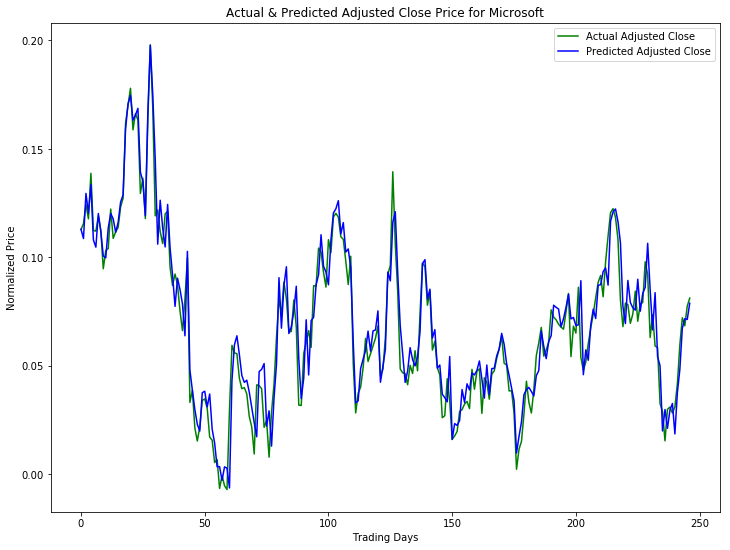

In [17]:
# Load datasets
csv_file = './data/MSFT.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=input_dim,
    output_dim=output_dim,
    return_sequences=False))

model.add(Dense(output_dim=1))
model.add(Activation(activation))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)

testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

MSFT_MSE = score
MSFT_RMSE = math.sqrt(score)
print 'Mean squared error (MSE)', MSFT_MSE
print 'Root Mean squared error (RMSE)', MSFT_RMSE

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for Microsoft')
ax.legend(loc='upper right')

plt.show()

### S&P 500

/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=False, input_shape=(None, 1))`
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


compilation time :  0.0483460426331
Train on 2109 samples, validate on 111 samples
Epoch 1/10
2109/2109 [==============================] - 378s - loss: 3.2186e-04 - val_loss: 1.9669e-04
Epoch 2/10
2109/2109 [==============================] - 374s - loss: 2.0234e-04 - val_loss: 1.7077e-04
Epoch 3/10
2109/2109 [==============================] - 370s - loss: 1.9636e-04 - val_loss: 1.6256e-04
Epoch 4/10
2109/2109 [==============================] - 12105s - loss: 1.9290e-04 - val_loss: 1.7275e-04
Epoch 5/10
2109/2109 [==============================] - 379s - loss: 1.8836e-04 - val_loss: 2.3758e-04
Epoch 6/10
2109/2109 [==============================] - 385s - loss: 1.9149e-04 - val_loss: 1.7160e-04
Epoch 7/10
2109/2109 [==============================] - 384s - loss: 1.8370e-04 - val_loss: 2.7659e-04
Epoch 8/10
2109/2109 [==============================] - 385s - loss: 1.8674e-04 - val_loss: 1.9650e-04
Epoch 9/10
2109/2109 [==============================] - 382s - loss: 1.8491e-04 - val_loss:

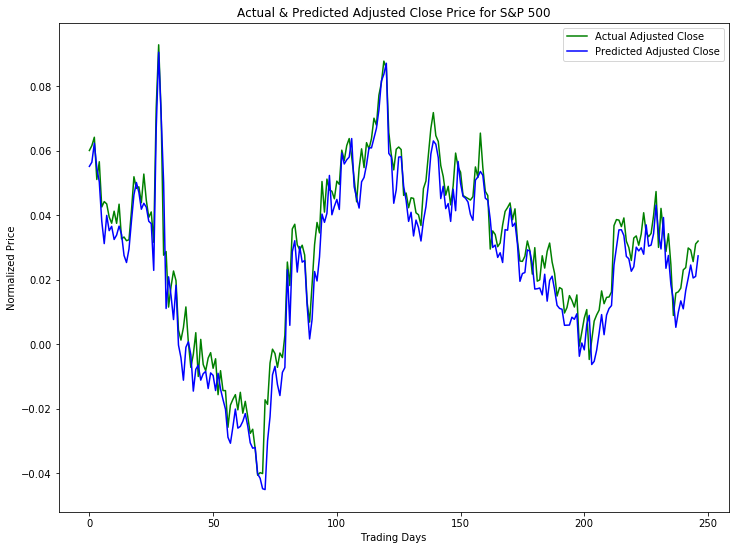

In [18]:
# Load datasets
csv_file = './data/^GSPC.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=input_dim,
    output_dim=output_dim,
    return_sequences=False))

model.add(Dense(output_dim=1))
model.add(Activation(activation))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)


testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

GSPC_MSE = score
GSPC_RMSE = math.sqrt(score)
print 'Mean squared error (MSE)', GSPC_MSE
print 'Root Mean squared error (RMSE)', GSPC_RMSE

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for S&P 500')
ax.legend(loc='upper right')

plt.show()

### Results

In [19]:
print 'Toyota (MSE): ', TM_MSE 
print 'Toyota (RMSE): ', TM_RMSE 
print 'Apple (MSE): ', APPL_MSE 
print 'Apple (RMSE): ', APPL_RMSE 
print 'GE (MSE): ', GE_MSE 
print 'GE (RMSE): ', GE_RMSE 
print 'Microsoft (MSE): ', MSFT_MSE 
print 'Microsoft (RMSE): ', MSFT_RMSE 
print 'S&P 500 (MSE): ', GSPC_MSE 
print 'S&P 500 (RMSE): ', GSPC_RMSE 

Toyota (MSE):  0.000131006485125
Toyota (RMSE):  0.0114458064428
Apple (MSE):  0.000140182430504
Apple (RMSE):  0.0118398661523
GE (MSE):  7.87504528992e-05
GE (RMSE):  0.00887414519259
Microsoft (MSE):  9.82947370459e-05
Microsoft (RMSE):  0.00991437022941
S&P 500 (MSE):  5.23874316281e-05
S&P 500 (RMSE):  0.00723791624904
